<a href="https://colab.research.google.com/github/TanChen168/Week11_IntroductionToDeepLearning/blob/main/NeuralNetworkKaggleExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [832]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [833]:
# Get data
df = pd.read_csv('/content/sample_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [834]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [835]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [836]:
# Fill in the missing data
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Pclass'].fillna(df['Pclass'].mean(), inplace = True)

# Binarize target column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [837]:
# Save X data
X = df.drop(columns = ['Survived', 'Cabin', 'Name', 'Ticket', 'Embarked'])
# Encode our target
y = df['Survived']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [838]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [839]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

7

In [840]:
# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(7, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(7, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

# Output layer
model.add(Dense(1, activation = 'sigmoid'))


In [841]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')


In [842]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)


Epoch 1/20
21/21 [==============================] - 1s 9ms/step - loss: 0.6622 - val_loss: 0.6511
Epoch 2/20
21/21 [==============================] - 0s 3ms/step - loss: 0.6363 - val_loss: 0.6266
Epoch 3/20
21/21 [==============================] - 0s 3ms/step - loss: 0.6123 - val_loss: 0.6049
Epoch 4/20
21/21 [==============================] - 0s 3ms/step - loss: 0.5897 - val_loss: 0.5855
Epoch 5/20
21/21 [==============================] - 0s 3ms/step - loss: 0.5701 - val_loss: 0.5690
Epoch 6/20
21/21 [==============================] - 0s 4ms/step - loss: 0.5530 - val_loss: 0.5560
Epoch 7/20
21/21 [==============================] - 0s 3ms/step - loss: 0.5384 - val_loss: 0.5462
Epoch 8/20
21/21 [==============================] - 0s 4ms/step - loss: 0.5272 - val_loss: 0.5379
Epoch 9/20
21/21 [==============================] - 0s 4ms/step - loss: 0.5163 - val_loss: 0.5324
Epoch 10/20
21/21 [==============================] - 0s 4ms/step - loss: 0.5078 - val_loss: 0.5278
Epoch 11/20
21/21 [

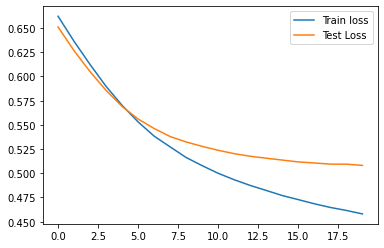

In [843]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();


In [844]:
# Get data
test = pd.read_csv('/content/sample_data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [845]:
# Fill in the missing data
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Pclass'].fillna(test['Pclass'].mean(), inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

# Binarize target column
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [846]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [847]:
# Clean the test data
to_model = test.drop(columns = ['Cabin', 'Name', 'Ticket', 'Embarked'])

In [848]:
to_model

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.50000,0,0,7.8292
1,893,3,1,47.00000,1,0,7.0000
2,894,2,0,62.00000,0,0,9.6875
3,895,3,0,27.00000,0,0,8.6625
4,896,3,1,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500
414,1306,1,1,39.00000,0,0,108.9000
415,1307,3,0,38.50000,0,0,7.2500
416,1308,3,0,30.27259,0,0,8.0500


In [849]:
preds


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [850]:
preds = model.predict(to_model).argmax(axis=1)
to_submit = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': preds})
to_submit
to_submit.to_csv('/content/sample_data/submission.csv', index=False)

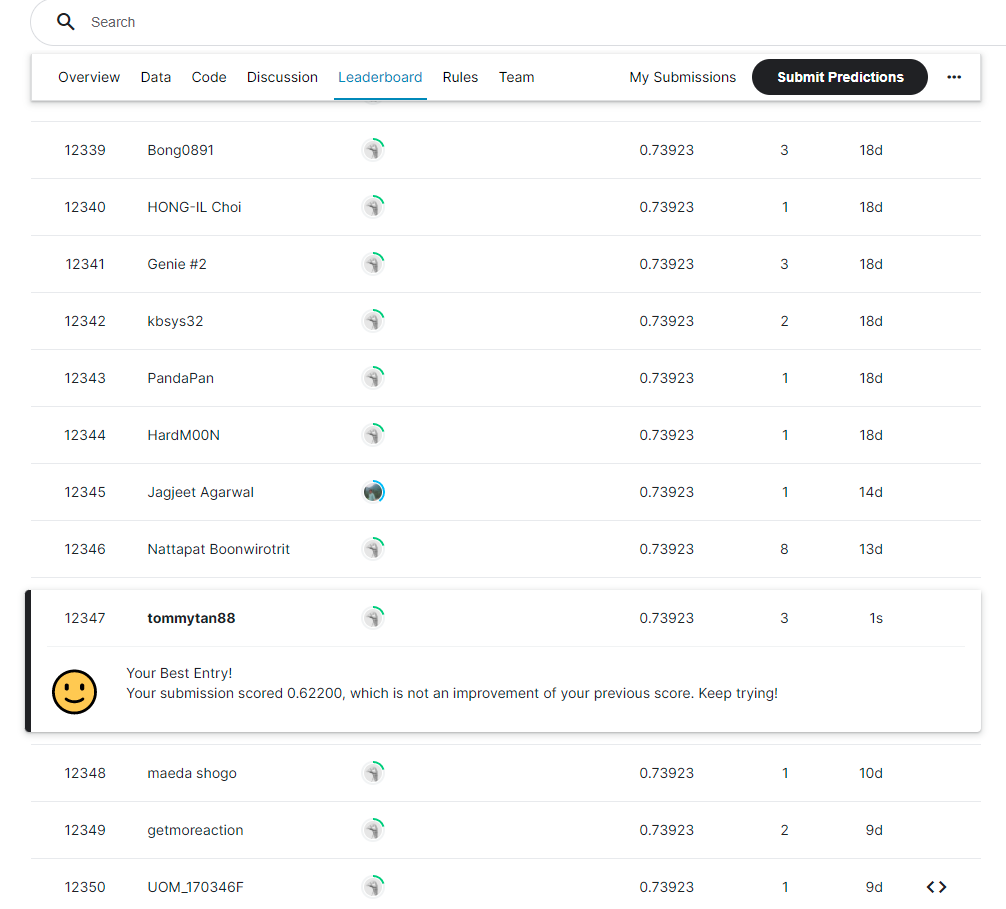